# CNN with Numpy

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pickle

## 1. Data Preparation

We load the MNIST and CIFAR-10 datasets.

In [2]:
def load_mnist():
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X = mnist.data
    y = mnist.target.astype(int)
    return X, y

Image shape: (70000, 784)
Labels shape: (70000,)


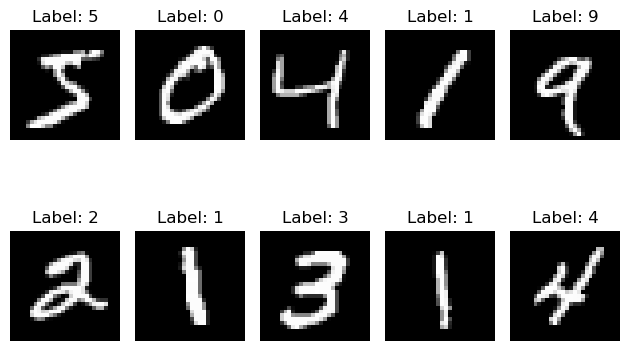

In [3]:
image, labels = load_mnist()
print("Image shape:", image.shape)
print("Labels shape:", labels.shape)

# Display the first 10 images and their labels
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# download the CIFAR-10 dataset
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz

--2025-06-04 05:55:47--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  30.0MB/s    in 6.1s    

2025-06-04 05:55:54 (26.7 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [7]:
def load_cifar10_batch(filepath):
    with open(filepath, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        data = batch[b'data']
        labels = batch[b'labels']

        images = data.reshape(-1, 3, 32, 32).astype(np.float32) / 255.0
        labels = np.array(labels, dtype=np.int64)
        return images, labels

def load_cifar10():
    X_list, y_list = [], []
    for i in range(1, 6):
        X, y = load_cifar10_batch(f'cifar-10-batches-py/data_batch_{i}')
        X_list.append(X)
        y_list.append(y)

    X_total = np.concatenate(X_list, axis=0)
    y_total = np.concatenate(y_list, axis=0)
    
    return X_total, y_total

Image shape: (50000, 3, 32, 32)
Labels shape: (50000,)


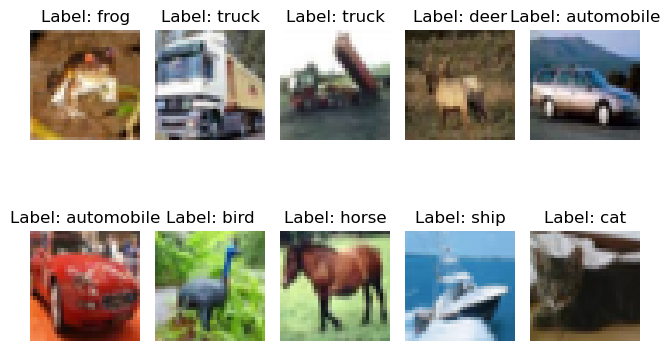

In [12]:
image, labels = load_cifar10()
CLASS_NAMES = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
print("Image shape:", image.shape)
print("Labels shape:", labels.shape)

# Display the first 10 images and their labels
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image[i].reshape(3, 32, 32).transpose(1, 2, 0))
    plt.title(f'Label: {CLASS_NAMES[labels[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 2. Model Definition

In [4]:
import cnns
mnist_model = cnns.build_CNN_mnist()
mnist_model.initialize()

image, labels = load_mnist()
image_example = image[:256].reshape(256, 1, 28, 28)
out_example = mnist_model.forward(image_example)
print("Output shape for MNIST example:", out_example.shape)

Output shape for MNIST example: (256, 10)
